# Assignment 3 - basic classifiers

Math practice and coding application for main classifiers introduced in Chapter 3 of the Python machine learning book. 

## Weighting

Note that this assignment is more difficult than the previous ones, and thus has a higher weighting 3 and longer duration (3 weeks). Each one of the previous two assignments has a weighting 1.

Specifically, the first 3 assignments contribute to your continuous assessment as follows:

Assignment weights: $w_1 = 1, w_2 = 1, w_3 = 3$

Assignment grades: $g_1, g_2, g_3$

Weighted average: $\frac{1}{\sum_i w_i} \times \sum_i \left(w_i \times g_i \right)$

Future assignments will be added analogously.

# RBF kernel (20 points)

Show that a Gaussian RBF kernel can be expressed as a dot product:
$$
K(\mathbf{x}, \mathbf{y}) 
= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} 
= \phi(\mathbf{x})^T \phi(\mathbf{y})
$$
by spelling out the mapping function $\phi$.

For simplicity
* you can assume both $\mathbf{x}$ and $\mathbf{y}$ are 2D vectors
$
x =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
, \;
y =
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$
* we use a scalar unit variance here

even though the proof can be extended for vectors $\mathbf{x}$ $\mathbf{y}$ and general covariance matrices.

Hint: use Taylor series expansion of the exponential function

## Answer
We denote $e^x$ as exp($x$). Since $
\mathbf x =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
, \;
\mathbf y =
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$, we have

$$
\begin{align}
K(\mathbf{x}, \mathbf{y}) = \text{exp}(\frac{-||\mathbf{x} - \mathbf{y}||^2}{2}) & =  \text{exp}(\frac{-||(x_1-y_1, x_2-y_2)||^2}{2} )\\
& = \text{exp}(\frac{-(x_1-y_1)^2-(x_2-y_2)^2}{2})\\
& = \text{exp}(\frac{-{x_1}^2-{x_2}^2-{y_1}^2-{y_2}^2+2 x_1 y_1+2 x_2 y_2}{2}) \\
& = \text{exp}(\frac{-||\mathbf{x}||^2}{2}) \text{ exp}(\frac{-||\mathbf{y}||^2}{2}) \text{ exp}(x_1 y_1 + x_2 y_2)
\end{align}
$$

<br>By Taylor series of $f(x)$ on $a$, $e^x$ at $a=0$ can be expressed as $\sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} +$ ... for $x \in \mathbb{R}^1$. Therefore,<br><br>

$$K(\mathbf{x}, \mathbf{y}) = \text{exp}(\frac{-||\mathbf{x}||^2}{2}) \text{ exp}(\frac{-||\mathbf{y}||^2}{2}) \sum_{n=0}^{\infty} \frac{(x_1 y_1 + x_2 y_2)^n}{n!}$$

<br>By binomial expansion, we have

$$ (x_1 y_1 + x_2 y_2)^n = \sum_{i = 0}^{n} \binom{n}{i} (x_1 y_1)^{n-i} (x_2 y_2)^i = \sum_{i = 0}^{n} \sqrt{\binom{n}{i}} (x_1^{n-i} x_2^i) \sqrt{\binom{n}{i}} (y_1^{n-i} y_2^i)$$

<br>We let $\xi_{n}(\mathbf{x}) = \xi_{n}(x_1, x_2) = \left[\sqrt{\binom{n}{i}} (x_1^{n-i} x_2^i) \right] = \left[\sqrt{\binom{n}{0}} (x_1^{n} x_2^0), \sqrt{\binom{n}{1}} (x_1^{n-1} x_2^1), ..., \sqrt{\binom{n}{n}} (x_1^{0} x_2^n)\right] \in \mathbb{R}^{\text{n}}$. <br>

<br>Hence we have <br>

$$ \left\{
\begin{aligned}
\phi(\mathbf{x}) & = \text{exp}(\frac{-||\mathbf{x}||^2}{2}) \left[1, \frac{\xi_{1}(\mathbf{x})}{\sqrt{1!}}, \frac{\xi_{2}(\mathbf{x})}{\sqrt{2!}} , \frac{\xi_{3}(\mathbf{x})}{\sqrt{3!}} , ... \right]^T \\
\phi(\mathbf{y}) & = \text{exp}(\frac{-||\mathbf{y}||^2}{2}) \left[1, \frac{\xi_{1}(\mathbf{y})}{\sqrt{1!}}, \frac{\xi_{2}(\mathbf{y})}{\sqrt{2!}} , \frac{\xi_{3}(\mathbf{y})}{\sqrt{3!}} , ... \right]^T
\end{aligned}
\right.
$$

<br>The mapping function is therefore $\phi(\mathbf{x}) = \text{exp}(\frac{-||\mathbf{x}||^2}{2}) \left[1, \frac{\xi_{1}(\mathbf{x})}{\sqrt{1!}}, \frac{\xi_{2}(\mathbf{x})}{\sqrt{2!}} , \frac{\xi_{3}(\mathbf{x})}{\sqrt{3!}} , ... \right]^T$, where $\xi_{n}(\mathbf{x}) = \left[\sqrt{\binom{n}{0}} (x_1^{n} x_2^0), \sqrt{\binom{n}{1}} (x_1^{n-1} x_2^1), ..., \sqrt{\binom{n}{n}} (x_1^{0} x_2^n)\right]$.

# Kernel SVM complexity (10 points)

How would the complexity (in terms of number of parameters) of a trained kernel SVM change with the amount of training data, and why?
Note that the answer may depend on the specific kernel used as well as the amount of training data.
Consider specifically the following types of kernels $K(\mathbf{x}, \mathbf{y})$.
* linear:
$$
K\left(\mathbf{x}, \mathbf{y}\right) = \mathbf{x}^T \mathbf{y}
$$
* polynomial with degree $q$:
$$
K\left(\mathbf{x}, \mathbf{y}\right) =
(\mathbf{x}^T\mathbf{y} + 1)^q
$$
* RBF with distance function $D$:
$$
K\left(\mathbf{x}, \mathbf{y} \right) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}}
$$


## Answer

For all examples, we assume $\mathbf{x}, \mathbf{y} \in \mathbb{R}^\text{d}$.

### Linear:
For linear kernal, the mapping function $\phi(\mathbf{x}) = \mathbf{x}$, which mapps $\mathbb{R}^\text{d}$ to $\mathbb{R}^\text{d}$, therefore the size of data is unchanged.<br>
There are not explicit parameters, therefore the time cost increase linearly with the dimension of data, or the amount of data increase $n$ times, the time cost simply increase $O(n)$ time. Both changes in dimension or data amount will not afftect any parameters.<br>

### Polynomial with degree $q$:
For simplicity we write $1 = x_{d+1} y_{d+1}$. Then

$$K\left(\mathbf{x}, \mathbf{y}\right) =(\mathbf{x}^T\mathbf{y} + 1)^q = (\sum_{i=1}^{d+1} x_i y_i)^q = \sum_{k_1 + k_2 + ... + k_{d+1} = q} \binom{q}{k_1, k_2, ..., k_{d+1}} \prod_{t=1}^{d+1} (x_t y_t)^{k_t} = \sum_{\sum_{i=1}^{d+1} k_i = q} \frac{q!}{\prod_{i=1}^{d+1} k_i!} \prod_{t=1}^{d+1} (x_t y_t)^{k_t}$$

by Multinomial theorem. Therefore the mapping function is

$$\phi(\mathbf{x}) = \left[\sqrt{\frac{q!}{\prod_{i=1}^{d+1} k_i!}} \prod_{t=1}^{d+1} (x_t)^{k_t}\right]_{\sum_{i=1}^{d+1} k_i = q}^T,$$

which maps $\mathbb{R}^\text{d}$ to $\mathbb{R}^\binom{p+(d+1)-1}{(d+1)-1} = \mathbb{R}^\binom{p+d}{d} = \mathbb{R}^\frac{(p+d)!}{p! d!}$, computed using the stars and bars method. <br>

* If $p=1$, only one useless dimension is added, where $x_{d+1} = 1$. In this case the actual dimension remains. <br>
* If $p>2$, then the dimension increases from $d$ to $\binom{p+d}{d}$, where actural dimension is $\binom{p+d}{d} - 1$ since we always have a $x_{d+1}^q = 1$ term.<br><br>

Now we consider the parameters.
* For each entry in $K\left(\mathbf{x}, \mathbf{y}\right)$, we have a parameter $\frac{q!}{\prod_{i=1}^{d+1} k_i!} = \binom{q}{k_1, k_2, ..., k_{d+1}}$, which takes $O(q \prod_{t=1}^{d+1} k_t)$ to compute in brute force. Considering the dimension analysis we discuss above, the greater the dimension or the greater $q$ is, the more parameters and greater time complexity we will have in the kernal function.<br>
* However, since $q$ and $k_i$ are identical for any set of input data, increasing amount of data will not change number of parameter to be calculated (because they only need to be calculated once), although multiplying them to each term of $x$ and $y$ takes constant time.<br>
* If we do $\mathbf{x}^T \mathbf{y} + 1$ first and then do the power function, then the parameter analysis is the same as the linear function, except that we need an extra power $q$ after the $\mathbf{x}^T \mathbf{y} + 1$.<br>

### RBF with distance function $D$:

Assume $D(\mathbf{x}, \mathbf{y}) = \omega(\mathbf{x}) \omega(\mathbf{y})$. For $K(\mathbf{x}, \mathbf{y} ) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}} = e^{-\frac{\omega(\mathbf{x}) \omega(\mathbf{y})}{2s^2}} = e^{-\frac{1}{2s^2} \omega(\mathbf{x}) \omega(\mathbf{y})}$, we have the mapping function as

$$
\phi(\mathbf{x}) = e^{-\frac{1}{4s^2}} \left[1, \frac{\omega(\mathbf{x})}{\sqrt {1!}}, \frac{\omega(\mathbf{x})^2}{\sqrt {2!}}, \frac{\omega(\mathbf{x})^3}{\sqrt {3!}}, ... \right]^T,
$$

which maps $\mathbb{R}^\text{d}$ to $\mathbb{R}^\infty$. That is, RBF essentially projects the original vector to an infinite dimensional space.<br><br>

Now we consider the parameters.
* We first clarify that although RBF maps $\mathbb{R}^\text{d}$ to $\mathbb{R}^\infty$, the dimension actually used is determined by the explicit function $K(\mathbf{x}, \mathbf{y})$, because we don't have to separate the mapping function. Instead, we can just compute the kernal $K$ directly.<br>
* As calculating exp($\mathbf{x}$) is simply mapping to an exponential function, the main cost in terms of dimension of data is at the distance function $D(\mathbf{x}, \mathbf{y})$, which varies with different distance functions we choose. For example, if we choose simple metrics such as Taxicab distance and Euclidean distance, the cost is relatively small. However, if we choose complex metrics for some reason, then the time cost could be huge.<br>
* Also, if all input data share the same set of parameters, then the parameters only need to be computed once, and applyed to each set of input data with constant time. However, if parameters change with different sets of input data in a specific kernal, then the number of parameters as well as time complexity also increase linearly with the increase of amount of data.

# Gaussian density Bayes (30 points)

$$
p\left(\Theta | \mathbf{X}\right)
= 
\frac{p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)}{p\left(\mathbf{X}\right)}
$$

Assume both the likelihood and prior have Gaussian distributions:

$$
\begin{align}
p(\mathbf{X} | \Theta)
&=
\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
\\
p(\Theta)
&=
\frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\end{align}
$$

Derive $\Theta$ from the dataset $\mathbf{X}$ via the following methods:

### ML (maximum likelihood) estimation 
$$
\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta)
$$

### MAP estimation
$$
\begin{align}
\Theta_{MAP} 
&= 
argmax_{\Theta} p(\Theta | \mathbf{X})
\\
&=
argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta)
\end{align}
$$

### Bayes estimation

$$
\begin{align}
\Theta_{Bayes} 
&= 
E(\Theta | \mathbf{X})
\\
&= 
\int \Theta p(\Theta | \mathbf{X}) d\Theta
\end{align}
$$

## Answer

### 1. ML (maximum likelihood) estimation 

To maximize $p(\mathbf{X} | \Theta)$, we set $\nabla_\Theta p(\mathbf{X} | \Theta) = \nabla_\Theta \left(\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)\right) = 0$. <br>
By Chain rule we get<br>
$$
\begin{align}
\nabla_\Theta p(\mathbf{X} | \Theta) & = \frac{1}{(2\pi)^{N/2}\sigma^N} \frac{\partial \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)}{\partial \left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)} \frac{\partial \left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)}{\partial \Theta}\\
0 & = \frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \left( - \frac{\sum_{t=1}^N -2(\mathbf{x}^{(t)} - \Theta)}{2\sigma^2} \right) \\
\end{align}
$$
Note that $p(\mathbf{X} | \Theta) = \frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)$ is non-zero, because $e^y$ is always positive for $y \in \mathbb{R}$, and the constant $\frac{1}{(2\pi)^{N/2}\sigma^N}$ is positive. <br>
Then we have<br>
$$
\begin{align}
0 & = \frac{\sum_{t=1}^N 2(\mathbf{x}^{(t)} - \Theta)}{2\sigma^2} = \frac{\sum_{t=1}^N \mathbf{x}^{(t)} - \Theta}{\sigma^2} \\
0 & = \frac{(\sum_{t=1}^N \mathbf{x}^{(t)}) - N\Theta}{\sigma^2} \\
N\Theta & = \sum_{t=1}^N \mathbf{x}^{(t)} \\
\Theta & = \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}
\end{align}
$$
Hence $$\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta) = \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}.$$

### 2. MAP estimation
To maximize $p(\mathbf{X} | \Theta) p(\Theta)$, we set $\nabla_\Theta (p(\mathbf{X} | \Theta) p(\Theta)) = p(\Theta)\nabla_\Theta p(\mathbf{X} | \Theta) + p(\mathbf{X} | \Theta)\nabla_\Theta p(\Theta) = 0$. <br><br>
We get $p(\Theta)\nabla_\Theta p(\mathbf{X} | \Theta) = - p(\mathbf{X} | \Theta)\nabla_\Theta p(\Theta) $ and therefore <br><br>
$$
\begin{align}
\frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right) \nabla_\Theta \left(\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)\right) & \\
= - \frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \nabla_\Theta & \left(\frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)
\end{align}
$$
<br><br>By Removing the constants we get<br><br>
$$
\begin{align}
\exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right) \nabla_\Theta \left(\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)\right) & = - \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \nabla_\Theta \left(\exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right) \\
\end{align}
$$
<br>By Chain rule we get<br><br>
$$
\begin{align}
\exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right) \frac{\partial \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)}{\partial \left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)} \frac{\partial \left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)}{\partial \Theta} & = - \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \frac{\partial \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)}{\partial \left(-\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right)} \frac{\partial \left(-\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right)}{\partial \Theta}\\
\exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right) \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \left( - \frac{\sum_{t=1}^N -2(\mathbf{x}^{(t)} - \Theta)}{2\sigma^2} \right) & = -\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right) \left(-\frac{2(\Theta - \mu_0)}{2\sigma_0^2}\right)
\end{align}
$$
<br>Since $e^y$ is always positive for $y \in \mathbb{R}$, the first two terms of both sides are non-zero. Dividing them on both sides we have<br>
$$
\begin{align}
- \frac{\sum_{t=1}^N -2(\mathbf{x}^{(t)} - \Theta)}{2\sigma^2} & = \frac{2(\Theta - \mu_0)}{2\sigma_0^2}\\
\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)}{\sigma^2} & = \frac{\Theta -\mu_0}{\sigma_0^2}\\
\frac{(\sum_{t=1}^N \mathbf{x}^{(t)}) - N\Theta}{\sigma^2} & = \frac{\Theta -\mu_0}{\sigma_0^2}\\
(\sum_{t=1}^N \mathbf{x}^{(t)})\sigma_0^2 - N\Theta\sigma_0^2 & = \sigma^2 \Theta - \sigma^2 \mu_0 \\
(\sum_{t=1}^N \mathbf{x}^{(t)})\sigma_0^2 + \sigma^2 \mu_0 & = (N\sigma_0^2 + \sigma^2)\Theta \\
\end{align}
$$
<br>Hence <br>
$$
\begin{align}
\Theta_{MAP} & = argmax_{\Theta} p(\Theta | \mathbf{X}) \\
& = argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta) \\
& = \frac{(\sum_{t=1}^N \mathbf{x}^{(t)})\sigma_0^2 + \sigma^2 \mu_0}{N\sigma_0^2 + \sigma^2} \\
\end{align}
$$<br>
Furthurmore, since $\Theta_{ML} = \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}$, we have<br>
$$\Theta_{MAP} = \frac{(\sum_{t=1}^N \mathbf{x}^{(t)})\sigma_0^2 + \sigma^2 \mu_0}{N\sigma_0^2 + \sigma^2}
= \frac{N\Theta_{ML}\sigma_0^2 + \sigma^2 \mu_0}{N\sigma_0^2 + \sigma^2} = \frac{N/\sigma^2}{N/\sigma^2 + 1/\sigma_0^2} \Theta_{ML} +\frac{1/\sigma_0^2}{N/\sigma^2 + 1/\sigma_0^2} \mu_0$$

### 3. Bayes estimation

For $\Theta_{Bayes} = E(\Theta | \mathbf{X}) = \int \Theta p(\Theta | \mathbf{X}) d\Theta \\$, since $p(\Theta | \mathbf{X}) = \frac{p(\mathbf{X}| \Theta) p(\Theta)}{p(\mathbf{X})}$ and $p(\mathbf{X})$ is a constant for given $\mathbf{X}$, our interest is in $p(\mathbf{X}| \Theta) p(\Theta)$. We denote $\phi(x, \mu, \sigma^2)$ as the normal distribution with input $x$, mean $\mu$ and standard deviation $\sigma$. Then  $$p(\mathbf{X}| \Theta) p(\Theta) = \phi(\Theta, \mu_0, \sigma_0^2) \prod_{i=1}^N \phi(\Theta, \mathbf{x}^{(i)}, \sigma^2).$$

Notice that $$\phi(x, \mu_1, \sigma_1^2) \phi(x, \mu_2, \sigma_2^2) = \phi(\mu_1, \mu_2, \sigma_1^2 + \sigma_2^2) \phi(x, \mu_i, \sigma_i^2)$$ where $$\mu_i = \frac{1 / \sigma_1^2}{1/ \sigma_1^2 + 1/ \sigma_2^2}\mu_1 + \frac{1 / \sigma_2^2}{1/ \sigma_1^2 + 1/ \sigma_2^2}\mu_2 \text{ and } \sigma_i^2 = \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}.$$<br>

We will prove the formula later on. Using this formuma, we have $$\phi(\Theta, \mathbf{x}^{(a)}, \sigma^2) \phi(\Theta, \mathbf{x}^{(b)}, \sigma^2) = \phi(\mathbf{x}^{(a)}, \mathbf{x}^{(b)}, 2\sigma^2) \phi(\Theta, \frac{\mathbf{x}^{(a)}+\mathbf{x}^{(b)}}{2}, \frac{\sigma^2}{2}) = C_0 \phi(\Theta, \frac{\mathbf{x}^{(a)}+\mathbf{x}^{(b)}}{2}, \frac{\sigma^2}{2}),$$ where $C_0$ is some constant since all variables of $\phi(\mathbf{x}^{(a)}, \mathbf{x}^{(b)}, 2\sigma^2)$ are set. Following similar steps we get

$$\prod_{i=1}^N \phi(\Theta, \mathbf{x}^{(i)}, \sigma^2) = C_1 \phi(\Theta,  \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}, \frac{\sigma^2}{N}),$$ where $C_1$ is some constant.<br>

Hence, $$p(\mathbf{X}| \Theta) p(\Theta) = C_1 \phi(\Theta, \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}, \frac{\sigma^2}{N}) \phi(\Theta, \mu_0, \sigma_0^2) =  C_2 \phi(\Theta, \mu_\text{new}, \sigma_\text{new}^2),$$ where $C_2$ is some constant and by the formula, $\mu_\text{new} = \frac{N/\sigma^2}{N/\sigma^2 + 1/\sigma_0^2} \Theta_{ML} +\frac{1/\sigma_0^2}{N/\sigma^2 + 1/\sigma_0^2} \mu_0 $, where $\Theta_{ML} = \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}.$ <br>

Notice that for a given normal distribution, multiplying the probability density function by a constant will not change its mean value. Therefore the expectation of $p(\Theta | \mathbf{X})$ is exactly the expectation of the non-constant normal distribution part. Hence,
$$
E(\Theta | \mathbf{X}) = \mu_\text{new} = \frac{N/\sigma^2}{N/\sigma^2 + 1/\sigma_0^2} \Theta_{ML} +\frac{1/\sigma_0^2}{N/\sigma^2 + 1/\sigma_0^2} \mu_0 = \Theta_{MAP},
$$
where $\Theta_{ML} = \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}.$ <br>

Finally we want to prove the formula $\phi(x, \mu_1, \sigma_1^2) \phi(x, \mu_2, \sigma_2^2) = \phi(\mu_1, \mu_2, \sigma_1^2 + \sigma_2^2) \phi(x, \mu_i, \sigma_i^2)$:<br><br>
$$
\begin{align}
\phi(x, \mu_1, \sigma_1^2) \phi(x, \mu_2, \sigma_2^2) & = \frac{1}{\sqrt{2\pi}\sigma_1} \exp\left( -\frac{(x - \mu_1)^2}{2\sigma_1^2} \right) \frac{1}{\sqrt{2\pi}\sigma_2} \exp\left( -\frac{(x - \mu_2)^2}{2\sigma_2^2} \right) \\
& =  \frac{1}{2\pi \sigma_1 \sigma_2} \exp\left( -\frac{(x - \mu_1)^2}{2\sigma_1^2} - \frac{(x - \mu_2)^2}{2\sigma_2^2}\right) \\
& = \frac{1}{2\pi \sigma_1 \sigma_2} \exp\left( -\frac{(\sigma_1^2+\sigma_2^2) x^2 -2(\mu_1 \sigma_2^2 +\mu_2 \sigma_1^2)x +(\mu_1^2 \sigma_2^2+\mu_2^2 \sigma_1^2)}{2\sigma_1^2 \sigma_2^2}    \right)\\
& = \frac{1}{2\pi \sigma_1 \sigma_2} \exp\left( -\frac{x^2 -2\frac{\mu_1 \sigma_2^2 +\mu_2 \sigma_1^2}{\sigma_1^2+\sigma_2^2}x + \frac{\mu_1^2 \sigma_2^2+\mu_2^2 \sigma_1^2}{\sigma_1^2+\sigma_2^2}}{2\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2+\sigma_2^2}}    \right) \\
& = \frac{1}{2\pi \sigma_1 \sigma_2} \exp\left( -\frac{x^2 -2\frac{\mu_1 \sigma_2^2 +\mu_2 \sigma_1^2}{\sigma_1^2+\sigma_2^2}x + \frac{\mu_1^2 \sigma_2^4+\mu_2^2 \sigma_1^4 + 2\mu_1 \sigma_2^2 \mu_2 \sigma_1^2}{(\sigma_1^2+\sigma_2^2)^2}}{2\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2+\sigma_2^2}} \right) \\
& \times \exp\left(\frac{ - (\sigma_1^2+\sigma_2^2)(\mu_1^2 \sigma_2^2+\mu_2^2 \sigma_1^2) +  (\mu_1^2 \sigma_2^4+\mu_2^2 \sigma_1^4 + 2\mu_1 \sigma_2^2 \mu_2 \sigma_1^2) }{2 \sigma_1^2 \sigma_2^2 (\sigma_1^2+\sigma_2^2)}\right) \\
& = \frac{1}{2\pi \sqrt{\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2+\sigma_2^2}} \sqrt{\sigma_1^2+\sigma_2^2}} \exp\left( -\frac{(x -\frac{\mu_1 \sigma_2^2 +\mu_2 \sigma_1^2}{\sigma_1^2+\sigma_2^2})^2}{2\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2+\sigma_2^2}} \right) \exp\left( -\frac{(\mu_1 - \mu_2)^2}{2 \sigma_1^2 + \sigma_2^2} \right)\\
& = \frac{1}{\sqrt{2\pi} \sqrt{\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2+\sigma_2^2}}} \exp\left( -\frac{(x -\frac{\mu_1 \sigma_2^2 +\mu_2 \sigma_1^2}{\sigma_1^2+\sigma_2^2})^2}{2\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2+\sigma_2^2}} \right) \frac{1}{\sqrt{2\pi} \sqrt{\sigma_1^2+\sigma_2^2}} \exp\left( -\frac{(\mu_1 - \mu_2)^2}{2 \sigma_1^2 + \sigma_2^2} \right)\\
& = \phi(x, \mu_i, \sigma_i^2) \phi(\mu_1, \mu_2, \sigma_1^2 + \sigma_2^2)\\
\end{align}
$$
where $$\mu_i = \frac{1 / \sigma_1^2}{1/ \sigma_1^2 + 1/ \sigma_2^2}\mu_1 + \frac{1 / \sigma_2^2}{1/ \sigma_1^2 + 1/ \sigma_2^2}\mu_2 \text{ and } \sigma_i^2 = \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}.$$<br>
Hence we complete the proof and we validate that
$$\Theta_{Bayes} = \mu_\text{new} = \frac{N/\sigma^2}{N/\sigma^2 + 1/\sigma_0^2} \Theta_{ML} +\frac{1/\sigma_0^2}{N/\sigma^2 + 1/\sigma_0^2} \mu_0.$$




# Hand-written digit classification (40 points)

In the textbook sample code we applied different scikit-learn classifers for the Iris data set.

In this exercise, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN
* naive Bayes

The dataset is available as part of scikit learn, as follows.

In [1]:
%load_ext watermark
%watermark -a '' -u -d -v -p numpy,pandas,matplotlib,scipy,sklearn
%matplotlib inline

last updated: 2016-10-17 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.1
scipy 0.17.1
sklearn 0.18


In [2]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

## Load data

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

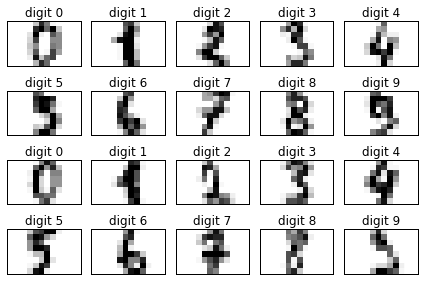

In [4]:
import matplotlib.pyplot as plt
import pylab as pl

num_rows = 4
num_cols = 5

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Date Preprocessing
Hint: How you divide training and test data set? And apply other techinques we have learned if needed.
You could take a look at the Iris data set case in the textbook.

In [5]:
from sklearn.preprocessing import StandardScaler
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
print ('scikit-learn version: ' + str(Version(sklearn_version)))

# 1. Standardize features by removing the mean and scaling to unit variance
X_std = StandardScaler().fit_transform(X) # fit_transform(X) will fit to data, then transform it.
print ('1. Complete removing the mean and scaling to unit variance.')

# 2. splitting data into 70% training and 30% test data: 
split_ratio = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=split_ratio, random_state=0)
print('2. Complete splitting with ' + str(y_train.shape[0]) + \
      '(' + str(int((1-split_ratio)*100)) +'%) training data and ' + \
      str(y_test.shape[0]) + '(' + str(int(split_ratio*100)) +'%) test data.')


scikit-learn version: 0.18
1. Complete removing the mean and scaling to unit variance.
2. Complete splitting with 1257(70%) training data and 540(30%) test data.


## Classifier #1 Perceptron

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Training
ppn = Perceptron(n_iter=800, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)
# Testing
y_pred = ppn.predict(X_test)
# Results
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified samples: 39 out of 540
Accuracy: 0.928


## Classifier #2 Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

# Training
lr = LogisticRegression(C=1.0, random_state=0) # we observe that changing C from 0.0001 to 1000 has ignorable effect
lr.fit(X_train, y_train)
# Testing
y_pred = lr.predict(X_test)
# Results
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified samples: 25 out of 540
Accuracy: 0.954


## Classifier #3 SVM

In [8]:
from sklearn.svm import SVC

# 1. Using linear kernel

# Training
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)
# Testing
y_pred = svm.predict(X_test)
# Results
print('1. Using linear kernel:')
print('   Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('   Accuracy: %.3f' % accuracy_score(y_test, y_pred))


# 2. Using rbf kernel

# Training
svm = SVC(kernel='rbf', C=1.0, random_state=0)
svm.fit(X_train, y_train)
# Testing
y_pred = svm.predict(X_test)
# Results
print('2. Using rbf kernel:')
print('   Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('   Accuracy: %.3f' % accuracy_score(y_test, y_pred))

1. Using linear kernel:
   Misclassified samples: 14 out of 540
   Accuracy: 0.974
2. Using rbf kernel:
   Misclassified samples: 8 out of 540
   Accuracy: 0.985


## Classifier #4 Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 1. Using entropy criterion

# Training
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, y_train)
# Testing
y_pred = tree.predict(X_test)
# Results
print('1. Using entropy criterion:')
print('   Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('   Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# 2. Using Gini criterion

# Training
tree = DecisionTreeClassifier(criterion='gini', random_state=0)
tree.fit(X_train, y_train)
# Testing
y_pred = tree.predict(X_test)
# Results
print('2. Using Gini criterion:')
print('   Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('   Accuracy: %.3f' % accuracy_score(y_test, y_pred))

1. Using entropy criterion:
   Misclassified samples: 71 out of 540
   Accuracy: 0.869
2. Using Gini criterion:
   Misclassified samples: 77 out of 540
   Accuracy: 0.857


## Classifer #5 Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# 1. Using entropy criterion

# Training
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
# Testing
y_pred = forest.predict(X_test)
# Results
print('1. Using entropy criterion:')
print('   Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('   Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# 2. Using Gini criterion

# Training
forest = RandomForestClassifier(criterion='gini', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
# Testing
y_pred = forest.predict(X_test)
# Results
print('2. Using Gini criterion:')
print('   Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('   Accuracy: %.3f' % accuracy_score(y_test, y_pred))

1. Using entropy criterion:
   Misclassified samples: 32 out of 540
   Accuracy: 0.941
2. Using Gini criterion:
   Misclassified samples: 27 out of 540
   Accuracy: 0.950


## Classifier #6 KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Training
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
# Testing
y_pred = knn.predict(X_test)
# Results
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified samples: 15 out of 540
Accuracy: 0.972


## Classifier #7 Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

# Training
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Testing
y_pred = gnb.predict(X_test)
# Results
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified samples: 123 out of 540
Accuracy: 0.772


Hence in this example, the accuracy of the predictions is ranked as (in descending order):
* SVM (rbf kernel) - 0.985 <br>
* SVM (linear kernel) - 0.974 <br>
* KNN - 0.972 <br>
* Logistic Regression - 0.954 <br>
* Random forest (Gini criterion) - 0.950 <br>
* Random forest (entropy criterion) - 0.941 <br>
* Perceptron - 0.928 <br>
* Decision Tree (entropy criterion) - 0.869 <br>
* Decision Tree (Gini criterion) - 0.857 <br>
* Naive Bayes - 0.772 <br>

The best is SVM (using rbf kernel). Because SVM maximize margins to nearest samples (called support vectors), which is considered as an effective way of classifying spacially separated samples. Also, SVM is more robust against outliers and offers slack variables as a solution to not linearly-separable samples. Moreover, using rbf kernel, the dimension is mapped to infinity and therefore samples are highly likely to be separated by some hyperplanes.

The worst is Naive Bayes. Because it assumes that all data are independent, which leads to high bias and low variance. When the input samples are not generally independent, the assumption fails and therefore the accuracy is low. Also, Naive Bayes cannot deal with outliers or noise, therefore unideal samples may not be correctly classified.